In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#print(train_X.shape)
#print(train_y.shape),
X, y = [], [] # for train

for i in range(train_X.shape[0]):
    X.append(train_X[i].flatten())
    tmp = np.array([0]*10)
    tmp[train_y[i]] = 1
    y.append(tmp)
X = np.array(X, dtype="float64").T # flatened train_X values
y = np.array(y, dtype="float64").T # one hot train_y values
print("X train shape:", X.shape)
print("y train shape:", y.shape)

X_, y_= [], []
for i in range(test_X.shape[0]):
    X_.append(train_X[i].flatten())
    tmp = np.array([0]*10)
    tmp[test_y[i]] = 1
    y_.append(tmp)
X_test = np.array(X_).T # flatened test_X values
y_test = np.array(y_).T # one hot test_y values

print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (784, 60000)
y train shape: (10, 60000)
X test shape: (784, 10000)
y test shape: (10, 10000)


Label: 5
Output array form: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<Figure size 432x288 with 0 Axes>

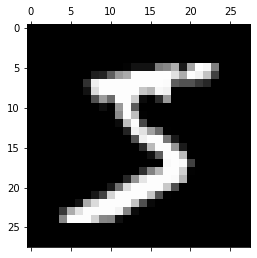

In [3]:
print("Label:", train_y[0])
print("Output array form:", y.T[0])

plt.gray()
plt.matshow(train_X[0])
plt.show()

In [4]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z>0

# def forward_prop(W1, b1, W2, b2, X): # X.shape -> 784,1
#     Z1 = W1@X + b1
#     A1 = ReLU(Z1)
#     Z2 = W2@A1 + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def backward_prop(Z1, A1, Z2, A2, W1, W2, X, y):
#     dZ2 = A2 - y
#     dW2 = 1 / m * dZ2 @ A1.T
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T @ dZ2 * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1 @ X.T
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha = 0.1):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
 

In [5]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2



In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y))
    print(b2)
    return W1, b1, W2, b2


m = 60000
W1, b1, W2, b2 = gradient_descent(X, y, 0.10, 10)

<ipython-input-4-16152b753b7a>:12: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / sum(np.exp(Z))
<ipython-input-4-16152b753b7a>:12: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(Z) / sum(np.exp(Z))


Iteration:  0
[9 4 6 ... 6 1 6] [5 0 4 ... 5 6 8]
0.08828333333333334
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


Prediction:  [0]
Label:  [0. 1. 0. ... 0. 0. 0.]


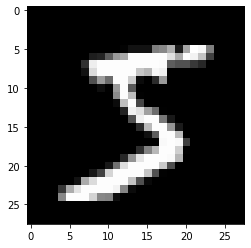

Prediction:  [0]
Label:  [0. 0. 0. ... 0. 0. 0.]


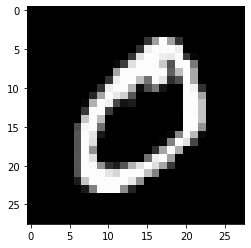

Prediction:  [0]
Label:  [0. 0. 0. ... 0. 0. 0.]


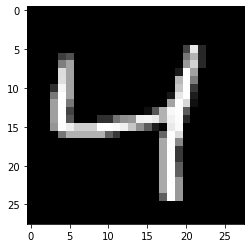

Prediction:  [0]
Label:  [0. 0. 0. ... 0. 0. 0.]


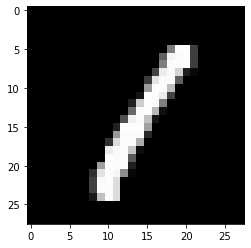

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = make_predictions(X[:, index, None], W1, b1, W2, b2)
    label = y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

